# Setup

Download the [data here](https://s3.embl.de/spatialdata/spatialdata-sandbox/xenium_rep1_io.zip).


In [1]:
%load_ext autoreload
%autoreload 2

from corescpy import Spatial
import scanpy as sc
import squidpy as sq
import functools
import os
from os import system
import pandas as pd
import numpy as np

ddd = os.path.join(os.path.expanduser("~"), "projects/data/public/xenium")

pd.options.display.max_columns = 100

# genes = ["CDKN1A", "CDKN2A", "TP53", "PLAUR",
#          "PTGER4", "ATG16L1", "NOD2", "LACC1"]
# cell_types = None
# palette = "tab20"

genes = dict(CSF=["CSF2", "CSF2RB", "CSF2RA"],
             All_ILCs=["IL7R"],
             ILC1=["TBX21", "KLRB1", "CCL5", "HSP90AA1", "IFNG"],
             ILC3=["RORC", "IL23R", "KIT", "CCL20", "TCF7", "IL22"],
             Cytokines=["IFNG", "IL22"])  # ILC1 & ILC3, respectively
cell_types = ["ILC3", "LTi-like NCR+ ILC3", "LTi-like NCR- ILC3",
              "ILCP", "Macrophages", "Stem cells"]
# palette = ["r", "tab:pink", "m", "b", "tab:brown", "cyan"]
palette = "tab10"

kws_pp = dict(cell_filter_pmt=[0, 100], cell_filter_ncounts=None,
              cell_filter_ngene=[0, None], gene_filter_ncell=[3, None],
              gene_filter_ncounts=None)  # can call using 1 arguments

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

# Data

In [2]:
d_p = os.path.join(ddd, "Xenium_V1_hColon_Non_diseased_Base_FFPE_outs")
self = Spatial(d_p)



<<< INITIALIZING SPATIAL CLASS OBJECT >>>



<<< INITIALIZING OMICS CLASS OBJECT >>>

Unused keyword arguments: {'library_id': None, 'visium': False}.




col_gene_symbols="gene_symbols"
col_cell_type="leiden"
col_sample_id="Sample"
col_batch="Sample"
col_subject=None
col_condition=None
col_num_umis=None



key_control=None
key_treatment=None

*** USING FILE PATH /home/elizabeth/elizabeth/projects/data/public/xenium/Xenium_V1_hColon_Non_diseased_Base_FFPE_outs as library ID.

INFO     reading                                                                                                   
         /home/elizabeth/elizabeth/projects/data/public/xenium/Xenium_V1_hColon_Non_diseased_Base_FFPE_outs/cell_fe
         ature_matrix.h5                                                                                           
dsfasfda AnnData object with n_obs × n_vars = 270984 × 325
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codewo

## Preprocessing


Un-Used Keyword Arguments: {'assay_protein': None, 'col_subject': None, 'col_condition': None, 'col_num_umis': None}




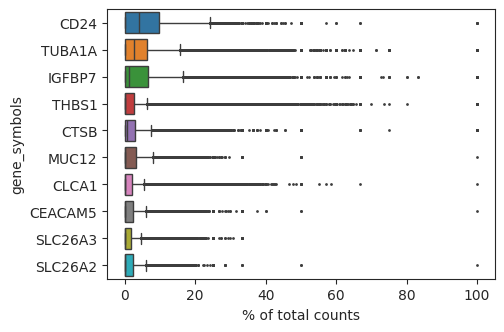

dsfasfda AnnData object with n_obs × n_vars = 270984 × 325
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'Sample', 'n_counts', 'log_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs', 'spatial'
    obsm: 'spatial'
    layers: 'counts'


Cell Counts: Initial


Observations: 270984



Gene Counts: Initial

Empty DataFrame
Columns: [gene_symbols, gene_ids, feature_types, genome]
Index: []




<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'Sample' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


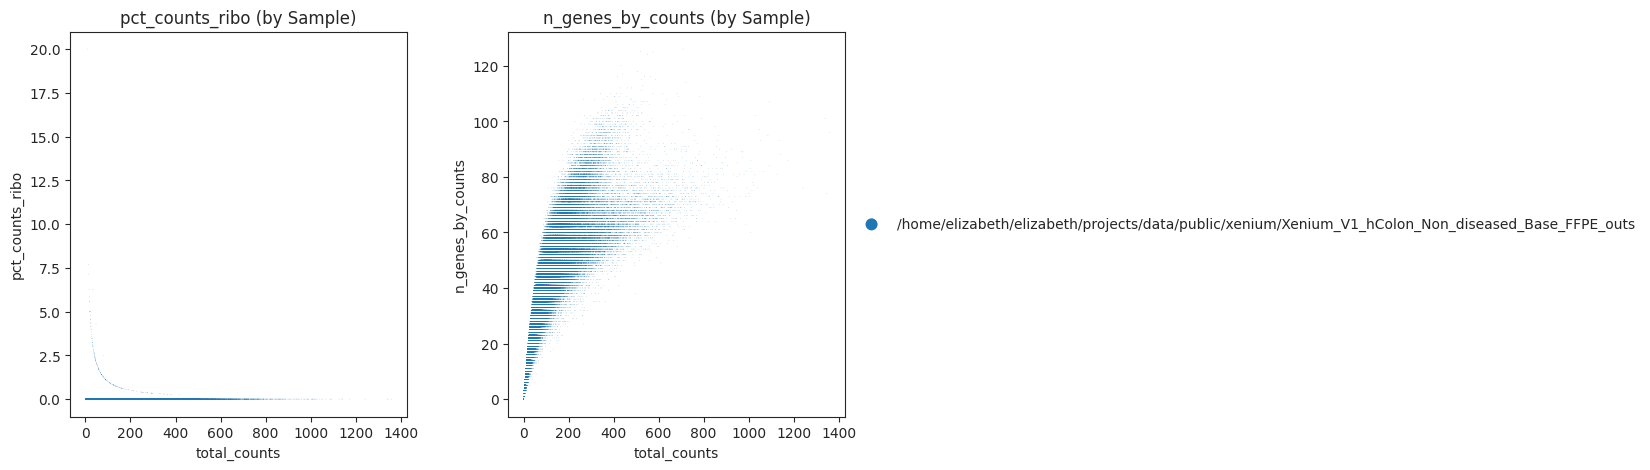


<<< FILTERING CELLS (TOO FEW GENES) & GENES (TOO FEW CELLS) >>>
dsfasfda AnnData object with n_obs × n_vars = 270984 × 325
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'Sample', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatialdata_attrs', 'spatial', 'Sample_colors'
    obsm: 'spatial'
    layers: 'counts'


Cell Counts: Post-Basic Filter


Observations: 270984



Gene Counts: Post-Ba

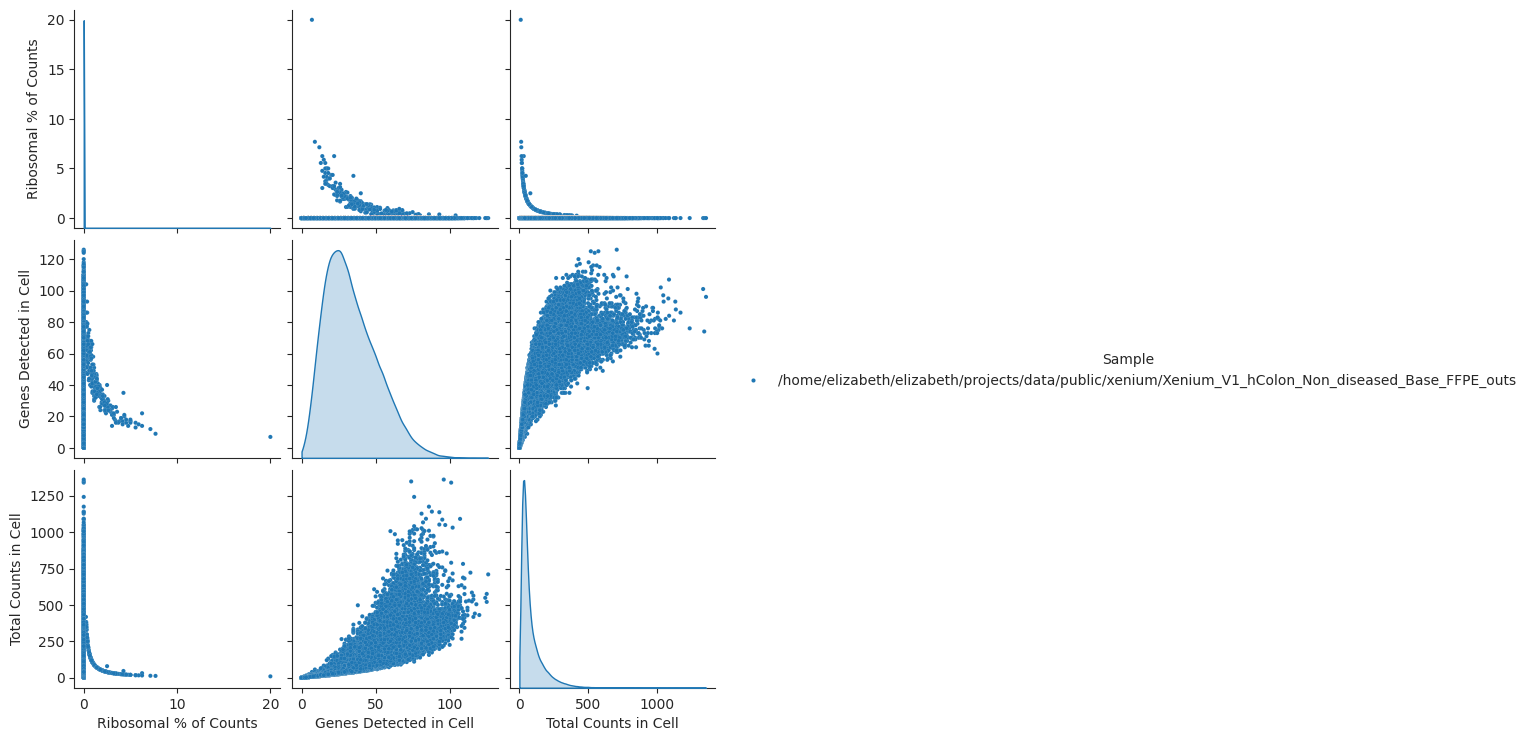

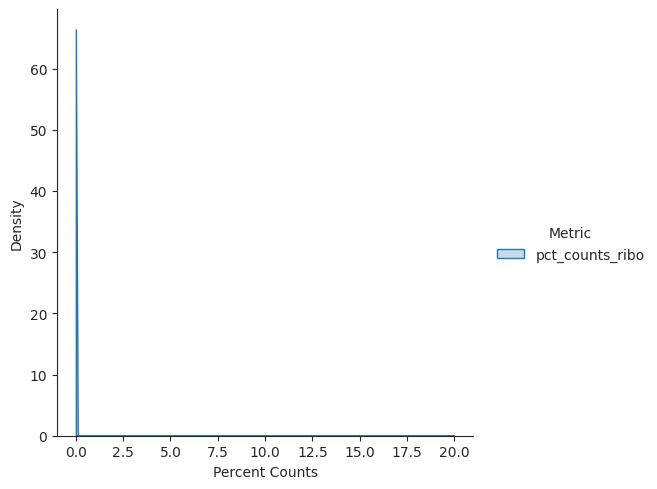

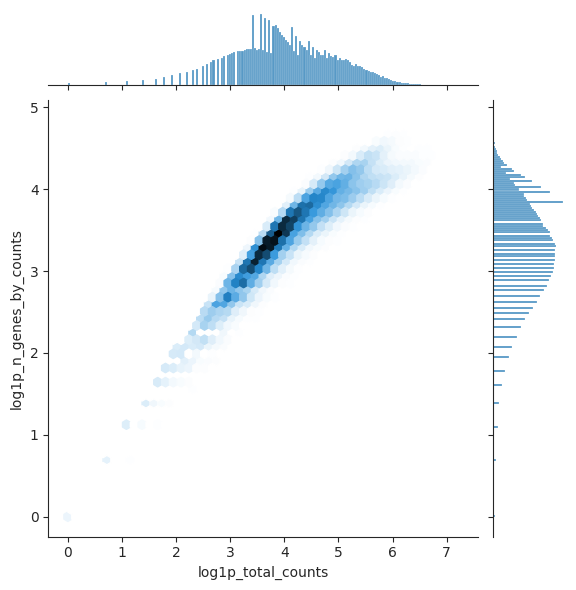

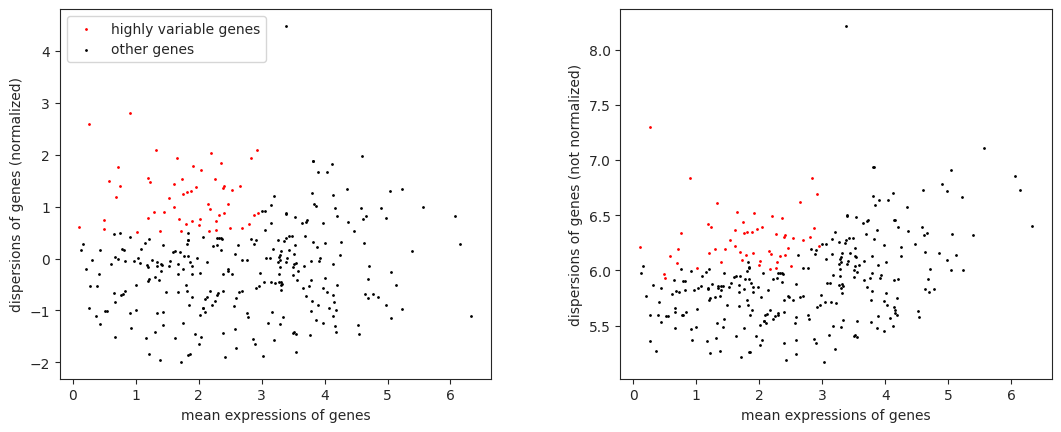


<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Scaling gene expression...

	*** Scaling => `.X` & scaled layer...
dsfasfda AnnData object with n_obs × n_vars = 270788 × 325
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'Sample', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'spatialdata_attrs', 'spatial'

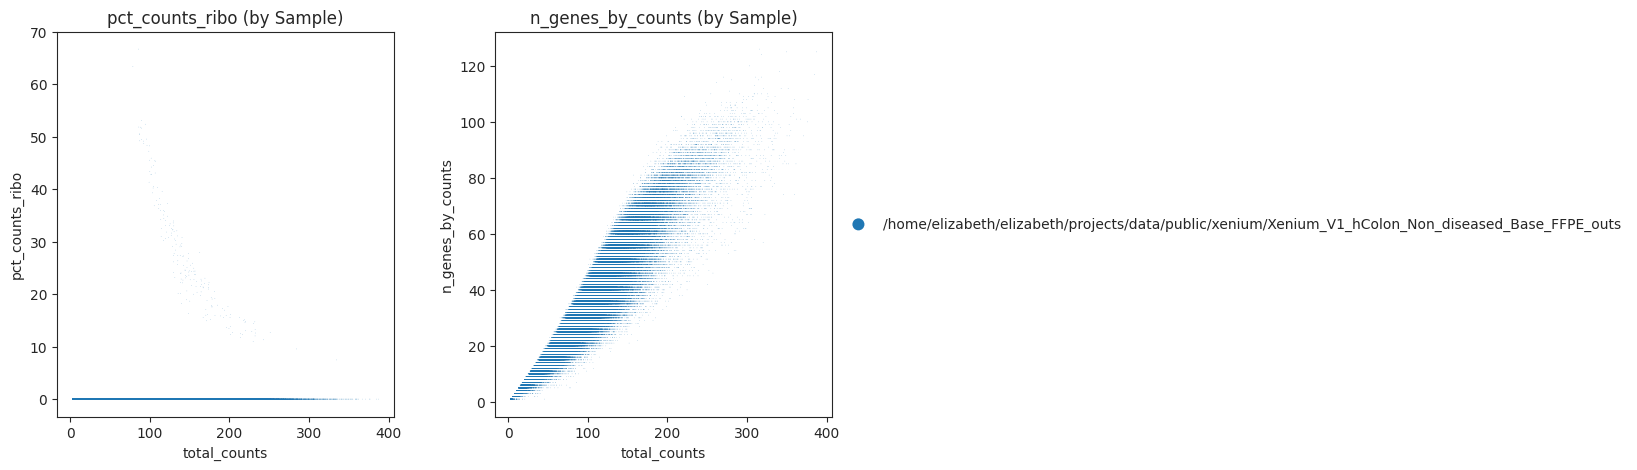

CPU times: user 3min 50s, sys: 48.9 s, total: 4min 39s
Wall time: 3min 23s


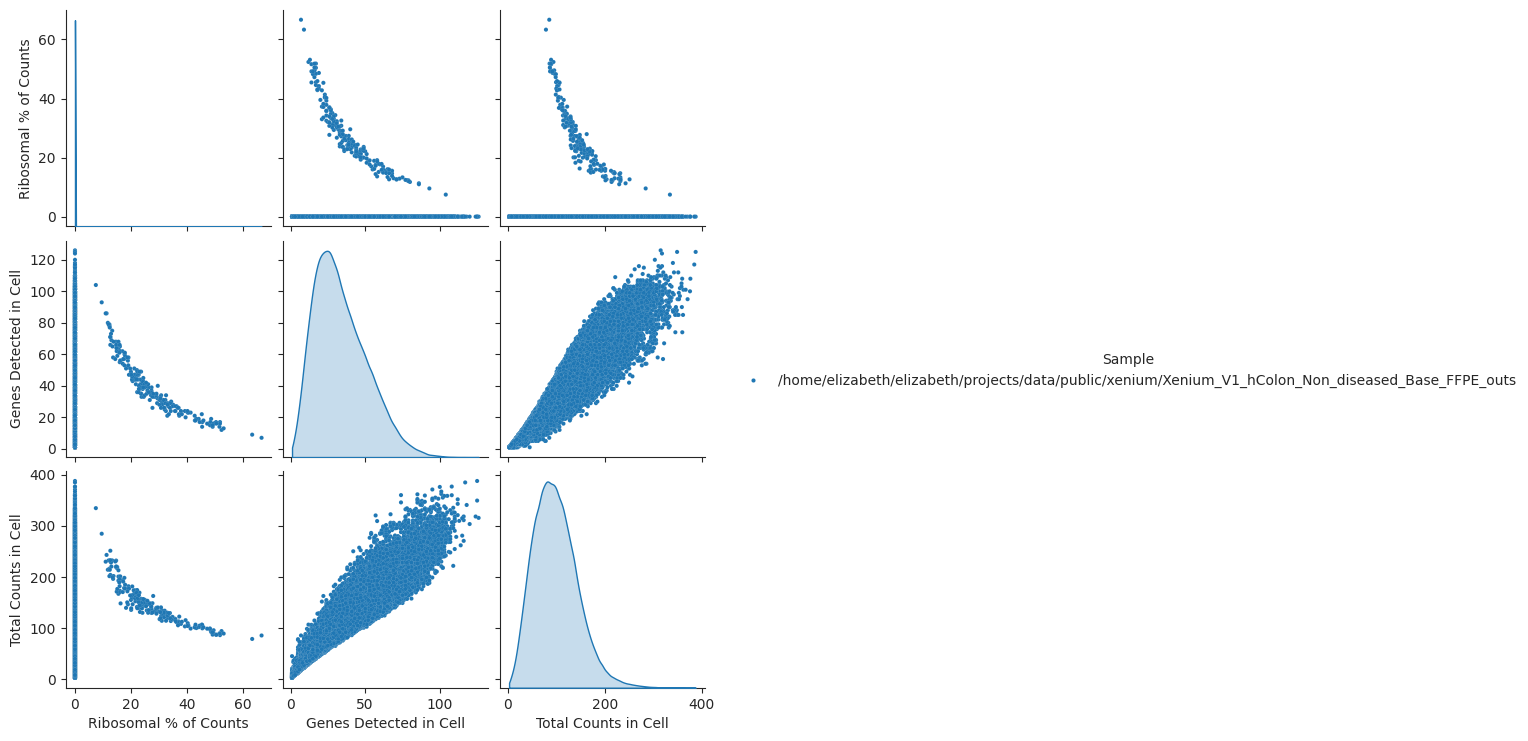

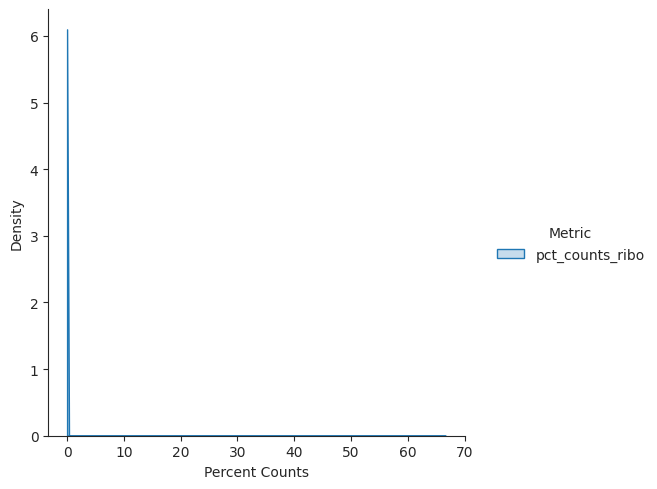

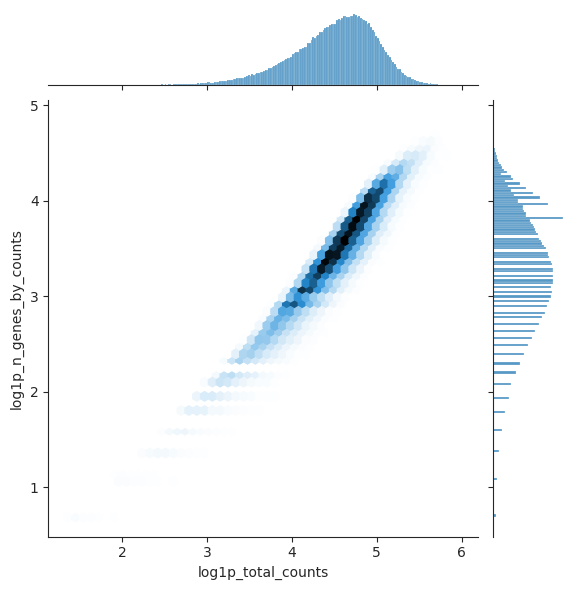

In [3]:
%%time

_ = self.preprocess(**kws_pp)

## Clustering

In [4]:
%%time

_ = self.cluster(n_comps=30, resolution=0.5)



Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': 'Sample', 'col_batch': 'Sample', 'col_subject': None, 'col_condition': None, 'col_num_umis': None, 'key_control': None, 'key_treatment': None}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


# Centrality Scores

In [ ]:
%%time

self.calculate_centrality(n_jobs=4)

# Cell Type Co-Occurrence

In [ ]:
%%time

ccts = self.rna.obs[self._columns["col_cell_type"]].unique().to_list()[:3]
_ = self.find_cooccurrence(key_cell_type=list(ccts), figsize=(60, 20),
                           kws_plot=dict(wspace=3))

# Neighbors Enrichment Analysis

In [ ]:
%%time

_ = self.calculate_neighborhood(figsize=(60, 30), cmap="coolwarm",
                                cbar_range=[-30, 30])

# Spatially-Variable Genes

In [ ]:
%%time

ggg = genes if genes and isinstance(genes, dict) else {"Genes": genes}
genes_all = functools.reduce(lambda i, j: i + j, [ggg[g] for g in ggg])
fig = self.find_svgs(
    genes=genes_all, method="moran", n_perms=10, kws_plot=dict(
        wspace=0.1, cmap="coolwarm", vcenter=0, size=3,
        legend_fontsize="large"), figsize=(15, 15))

# Receptor-Ligand Interactions

In [ ]:
%%time

ccts = self.rna.obs[self._columns["col_cell_type"]].unique().to_list()[:3]
out = self.calculate_receptor_ligand(
    key_sources=ccts, key_targets=ccts, col_condition=False,
    p_threshold=0.001, remove_ns=True, figsize=(15, 10))